In [2]:
from qiskit import *

In [3]:
circuit = QuantumCircuit(3,3) # 3 quantum bits, 3 classical bits

In [4]:
%matplotlib inline
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [5]:
circuit.x(0)
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [6]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [7]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [8]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [9]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

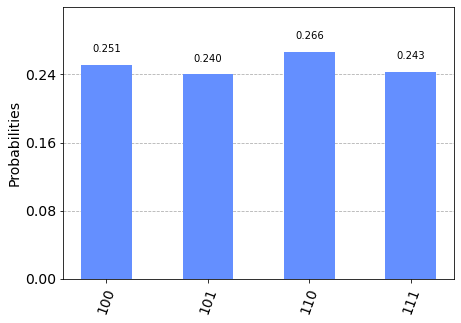

In [10]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots=1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [11]:
print(counts)

{'100': 257, '111': 249, '110': 272, '101': 246}


In [13]:
# Challenge: teleport state (|0>+|1>)/sqrt(2)
circuit2 = QuantumCircuit(3,3)
circuit2.h(0)
circuit2.barrier()
circuit2.h(1)
circuit2.cx(1,2)
circuit2.cx(0,1)
circuit2.h(0)
circuit2.barrier()
circuit2.measure([0,1],[0,1])
circuit2.barrier()
circuit2.cx(1,2)
circuit2.cz(0,2)
circuit2.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ H ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

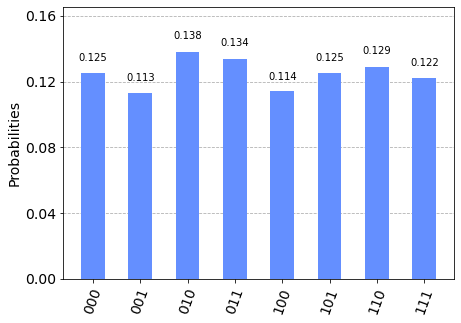

In [14]:
circuit2.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit2,backend=simulator,shots=1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)